<a href="https://colab.research.google.com/github/AzadMehedi/Python/blob/main/Predict_Stock_Prices_Using_Machine_Learning_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Install dependencies
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


In [4]:
#Stror data into a dataframe
df = pd.read_csv('NFLX.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
1,2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2,2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
3,2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000
4,2021-11-05,663.969971,665.640015,645.010010,645.719971,645.719971,5283500


In [5]:
#Get the number of trading days
df.shape

(251, 7)

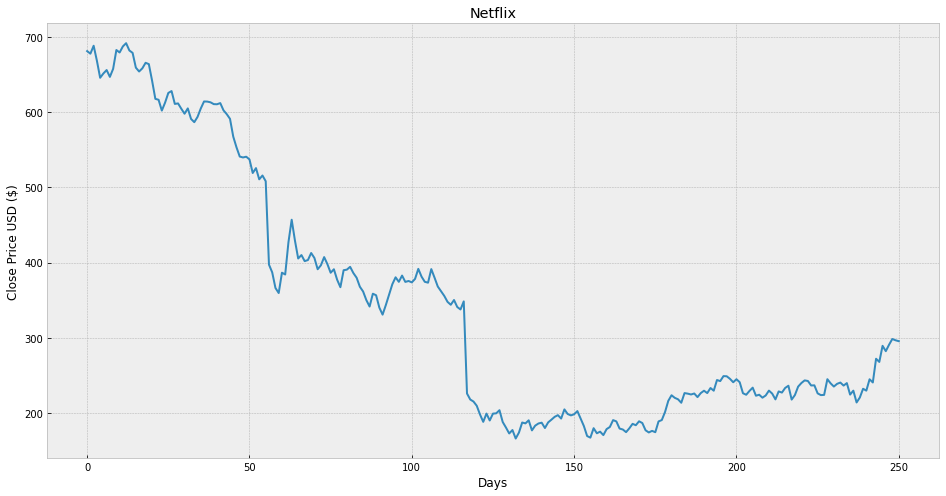

In [6]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close'])
plt.show()

In [7]:
#Get the Close price
df = df[['Close']]
df.head()

,Close
0,681.169983
1,677.719971
2,688.289978
3,668.400024
4,645.719971


In [8]:
#Create a variable to predict the 'x' days out of into the future
future_days = 25
#Create a new column (Target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
247,291.019989,NaN
248,298.619995,NaN
249,296.940002,NaN
250,295.720001,NaN


In [9]:
#Create the feature dataset (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X) 

[[681.169983]
 [677.719971]
 [688.289978]
 [668.400024]
 [645.719971]
 [651.450012]
 [655.98999 ]
 [646.909973]
 [657.580017]
 [682.609985]
 [679.330017]
 [687.400024]
 [691.690002]
 [682.02002 ]
 [678.799988]
 [659.200012]
 [654.059998]
 [658.289978]
 [665.640015]
 [663.840027]
 [641.900024]
 [617.77002 ]
 [616.469971]
 [602.130005]
 [612.690002]
 [625.580017]
 [628.080017]
 [611.      ]
 [611.659973]
 [604.559998]
 [597.98999 ]
 [605.039978]
 [591.059998]
 [586.72998 ]
 [593.73999 ]
 [604.919983]
 [614.23999 ]
 [614.090027]
 [613.119995]
 [610.710022]
 [610.539978]
 [612.090027]
 [602.440002]
 [597.369995]
 [591.150024]
 [567.52002 ]
 [553.289978]
 [541.059998]
 [539.849976]
 [540.840027]
 [537.219971]
 [519.200012]
 [525.690002]
 [510.799988]
 [515.859985]
 [508.25    ]
 [397.5     ]
 [387.149994]
 [366.420013]
 [359.700012]
 [386.700012]
 [384.359985]
 [427.140015]
 [457.130005]
 [429.480011]
 [405.600006]
 [410.170013]
 [402.100006]
 [403.529999]
 [412.890015]
 [406.269989]
 [391.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [10]:
#Create the target dataset (y) and convert it to a numpy array and get of the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[625.580017 628.080017 611.       611.659973 604.559998 597.98999
 605.039978 591.059998 586.72998  593.73999  604.919983 614.23999
 614.090027 613.119995 610.710022 610.539978 612.090027 602.440002
 597.369995 591.150024 567.52002  553.289978 541.059998 539.849976
 540.840027 537.219971 519.200012 525.690002 510.799988 515.859985
 508.25     397.5      387.149994 366.420013 359.700012 386.700012
 384.359985 427.140015 457.130005 429.480011 405.600006 410.170013
 402.100006 403.529999 412.890015 406.269989 391.309998 396.570007
 407.459991 398.079987 386.670013 391.290009 377.380005 367.459991
 390.029999 390.799988 394.519989 386.23999  380.029999 368.070007
 361.730011 350.26001  341.76001  358.790009 356.769989 340.320007
 331.01001  343.75     357.529999 371.399994 380.600006 374.589996
 382.920013 374.48999  375.709991 373.850006 378.51001  391.820007
 381.470001 374.589996 373.470001 391.5      380.149994 368.350006
 362.149994 355.880005 348.       344.100006 350.429993 341.1300

In [11]:
df.head()

,Close,Prediction
0,681.169983,625.580017
1,677.719971,628.080017
2,688.289978,611.000000
3,668.400024,611.659973
4,645.719971,604.559998


In [12]:
#Split the data ito 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [13]:
#Create the models
#Create the decision tree regression model
tree = DecisionTreeRegressor().fit(X_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(X_train, y_train)

In [14]:
#Get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[241.160004],
       [226.539993],
       [224.550003],
       [229.610001],
       [233.979996],
       [223.279999],
       [224.570007],
       [220.649994],
       [223.559998],
       [230.039993],
       [226.110001],
       [218.389999],
       [228.960007],
       [227.440002],
       [233.570007],
       [236.529999],
       [218.130005],
       [224.119995],
       [235.380005],
       [240.130005],
       [243.630005],
       [242.850006],
       [236.869995],
       [237.050003],
       [226.410004]])

In [15]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[224.070007 227.440002 245.199997 233.570007 230.       239.039993
 240.740005 236.729996 239.039993 224.75     229.979996 214.289993
 220.869995 232.509995 230.       245.100006 240.860001 245.199997
 268.160004 289.570007 282.450012 291.019989 298.619995 296.940002
 218.389999]

[229.2129821  219.10594312 217.73023236 221.22828698 224.24933189
 216.85225902 217.74406143 215.03409602 217.04582664 221.52554708
 218.80868302 213.47172664 220.77893611 219.72813322 223.96590017
 226.01218827 213.29198878 217.4329612  225.21717969 228.50092791
 230.92053186 230.38130653 226.24723274 226.37167505 219.01607972]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


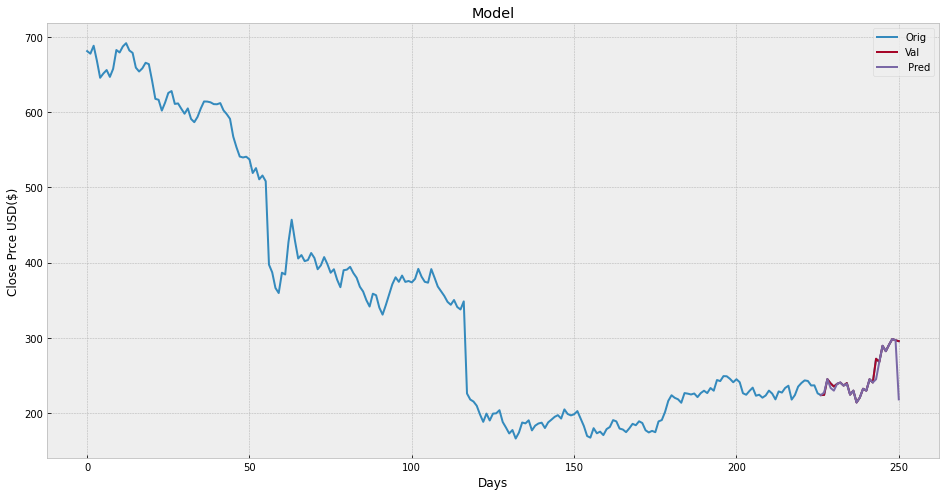

In [20]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]: ]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Prce USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val',' Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


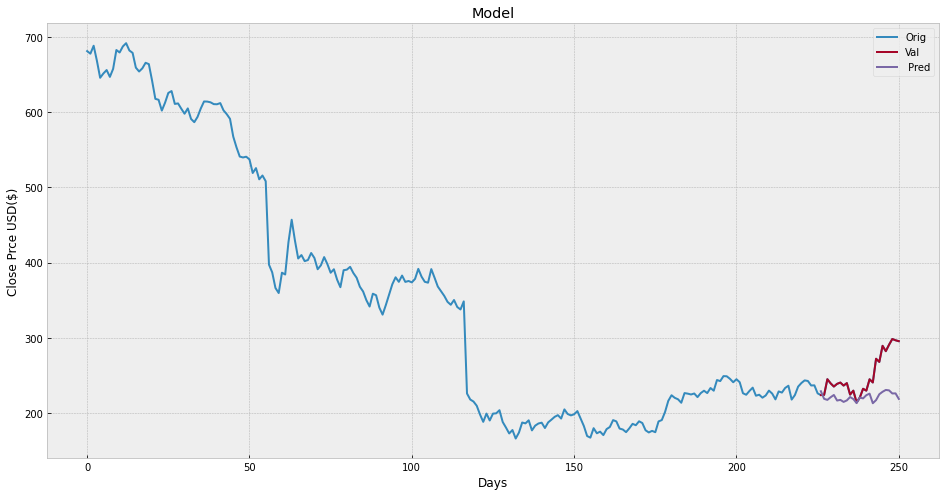

In [21]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]: ]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Prce USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val',' Pred'])
plt.show()